<a href="https://colab.research.google.com/github/AtifQureshi110/Projects/blob/main/cat_dog_image_classsification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# libraries

In [19]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import pickle
import numpy as np
from PIL import Image
from keras.models import load_model

import matplotlib.pyplot as plt
import zipfile
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, BatchNormalization, Dropout

# dataset

In [70]:
zip_ref = zipfile.ZipFile("/content/drive/MyDrive/image classification /archive.zip", "r")
zip_ref.extractall("/content")
zip_ref.close()

In [71]:
# generators
train_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/train',
    labels='inferred',
    label_mode = 'int',
    batch_size=32,
    image_size=(256,256)
)

validation_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/test',
    labels='inferred',
    label_mode = 'int',
    batch_size=32,
    image_size=(256,256)
)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [29]:
# Normalize
def process(image,label):
    image = tf.cast(image/255. ,tf.float32)
    return image,label

train_ds = train_ds.map(process)
validation_ds = validation_ds.map(process)

# model training and designing  

In [30]:
# create CNN model
model = Sequential()
# 10,20,40,80
model.add(Conv2D(10,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(20,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(40,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(80,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())

# 80, 40, 20, 10, 1
model.add(Dense(80,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(40,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(20,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(10,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1,activation='sigmoid'))

In [31]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 254, 254, 10)      280       
                                                                 
 batch_normalization_8 (Bat  (None, 254, 254, 10)      40        
 chNormalization)                                                
                                                                 
 max_pooling2d_8 (MaxPoolin  (None, 127, 127, 10)      0         
 g2D)                                                            
                                                                 
 conv2d_9 (Conv2D)           (None, 125, 125, 20)      1820      
                                                                 
 batch_normalization_9 (Bat  (None, 125, 125, 20)      80        
 chNormalization)                                                
                                                      

In [32]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [33]:
history = model.fit(train_ds,epochs=6,validation_data=validation_ds)

Epoch 1/6
625/625 [==============================] - 50s 74ms/step - loss: 0.6677 - accuracy: 0.6048 - val_loss: 0.6592 - val_accuracy: 0.5976
Epoch 2/6
625/625 [==============================] - 50s 79ms/step - loss: 0.5484 - accuracy: 0.7169 - val_loss: 0.5447 - val_accuracy: 0.7074
Epoch 3/6
625/625 [==============================] - 50s 79ms/step - loss: 0.4524 - accuracy: 0.7911 - val_loss: 0.4406 - val_accuracy: 0.7880
Epoch 4/6
625/625 [==============================] - 47s 75ms/step - loss: 0.3697 - accuracy: 0.8342 - val_loss: 0.4018 - val_accuracy: 0.8214
Epoch 5/6
625/625 [==============================] - 46s 73ms/step - loss: 0.2971 - accuracy: 0.8738 - val_loss: 0.3758 - val_accuracy: 0.8392
Epoch 6/6
625/625 [==============================] - 46s 73ms/step - loss: 0.2198 - accuracy: 0.9122 - val_loss: 0.3773 - val_accuracy: 0.8464


# viz of training proecess

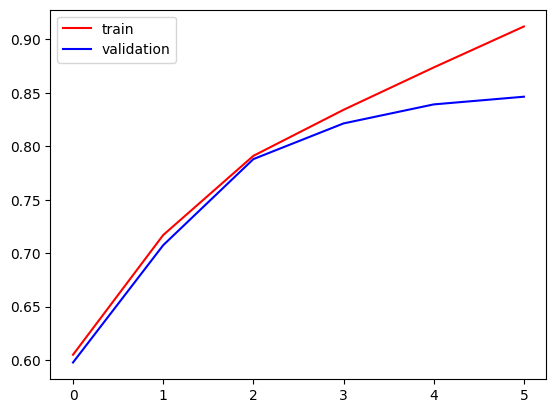

In [35]:
plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

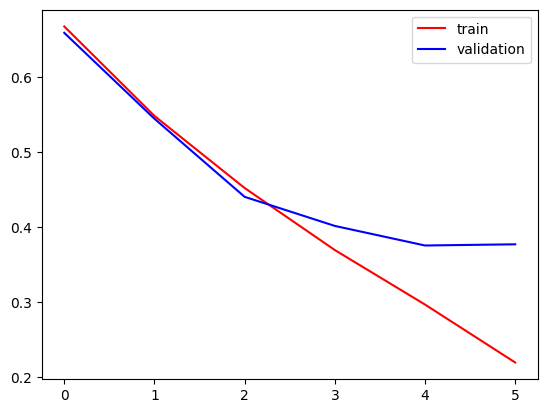

In [36]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

# save and load model

In [72]:
# Define save directory
save_directory = '/content/drive/MyDrive/image classification '

# Save the model as a pickle file
with open(f'{save_directory}/my_model.pkl01', 'wb') as file:
    pickle.dump(model, file)


In [73]:
# Load the saved model
save_directory = '/content/drive/MyDrive/image classification '
with open(f'{save_directory}/my_model.pkl01', 'rb') as file:
    model = pickle.load(file)

# test dataset prediction

In [76]:
# Load and preprocess the new image(s)
def preprocess_image(image_path):
    # Load the image
    img = Image.open(image_path)
    # Resize the image to match the input shape of the model (e.g., 256x256)
    img = img.resize((256, 256))
    # Convert the image to a numpy array and normalize the pixel values
    img_array = np.array(img) / 255.0
    # Add a batch dimension to the image array
    img_array = np.expand_dims(img_array, axis=0)
    return img_array

In [77]:
# Predict on the preprocessed image(s)
def predict_image(image_path):
    # Preprocess the image
    img_array = preprocess_image(image_path)
    # Make predictions using the model
    predictions = model.predict(img_array)
    return predictions

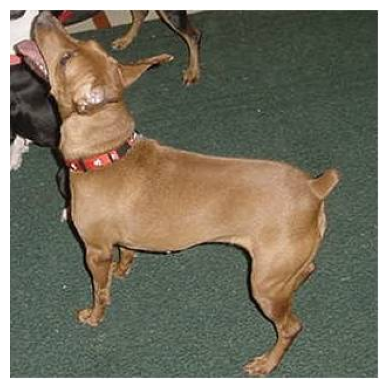

1/1 [==============================] - 0s 139ms/step
dog


In [78]:
def show_img(path):
  # Load and display the image
  img = mpimg.imread(path)
  imgplot = plt.imshow(img)
  plt.axis('off')  # Hide the axis
  return plt.show()

def pred(path):
    # Example usage
  predictions = predict_image(path)
  if predictions > 0.5:
    print("dog")
  else:
    print("cat")
img = "/content/test/dogs/dog.10010.jpg"
show_img(img)
pred(img)

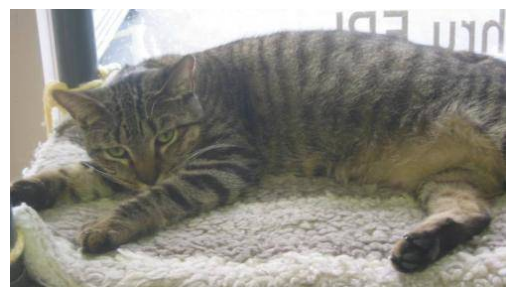

1/1 [==============================] - 0s 19ms/step
cat


In [79]:
img = "/content/test/cats/cat.10017.jpg"
show_img(img)
pred(img)

# prediction on new dataset

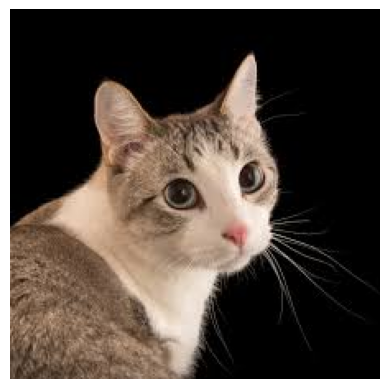

1/1 [==============================] - 0s 20ms/step
cat


In [80]:
img = "/content/cat01.jpg"
show_img(img)
pred(img)

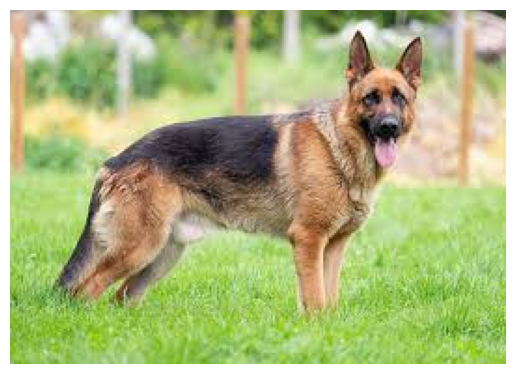

1/1 [==============================] - 0s 35ms/step
dog


In [82]:
img = '/content/dog.jpg'
show_img(img)
pred(img)